In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_rows', 7)
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 4

In [3]:
data = loadmat('ex4data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [4]:
X = data['X']
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y = data['y']
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

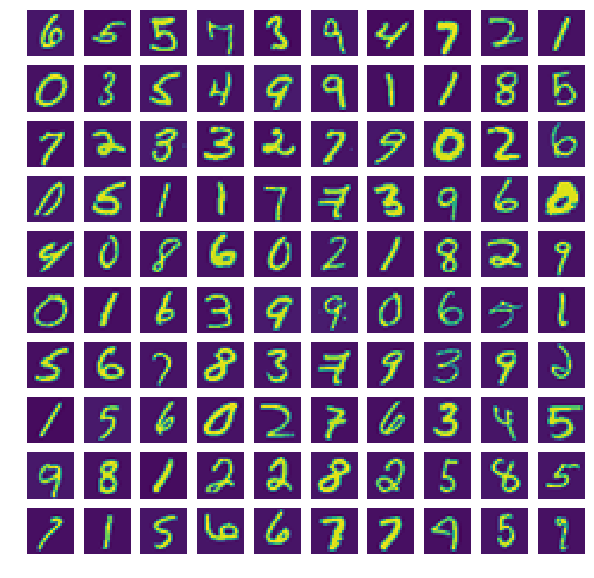

In [6]:
FIG_SIZE = 10
_, axarr = plt.subplots(FIG_SIZE, FIG_SIZE, figsize=(FIG_SIZE, FIG_SIZE))
for i in range(FIG_SIZE):
    for j in range(FIG_SIZE):
        random_digit = X[np.random.randint(X.shape[0])]
        axarr[i, j].imshow(random_digit.reshape((20, 20), order='F'))
        axarr[i, j].axis('off')

In [7]:
weights = loadmat('ex4weights.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']
print(f"Theta shapes: theta1={theta1.shape}, theta2={theta2.shape}")

Theta shapes: theta1=(25, 401), theta2=(10, 26)


In [8]:
#unroll params
#ravel "F"- flatten thetas in column-major
nn_params = np.hstack((theta1.ravel(order='F'), 
                       theta2.ravel(order='F')))
nn_params

array([-0.02256239, -0.09838113,  0.11615605, ..., -2.11014003,
       -2.1319153 , -1.32752042])

In [9]:
m, n = X.shape
ones = np.ones((m, 1))
m

5000

In [10]:
#neural network hyperparameters
input_layer_size = 400
hidden_layer_size = 25
num_of_labels = 10
lmbda = 1

In [11]:
#one hot encoding
y_dummies = pd.get_dummies(y.flatten()).values
y_dummies

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [13]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_of_labels, X, y, lmbda):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size*(input_layer_size+1)],
                    (hidden_layer_size, input_layer_size+1), 'F')
    theta2 = np.reshape(nn_params[hidden_layer_size*(input_layer_size+1):],
                        (num_of_labels, hidden_layer_size+1), 'F')

    a1 = np.hstack((ones, X))
    a2 = sigmoid(a1 @ theta1.T)
    a2 = np.hstack((ones, a2))
    h = sigmoid(a2 @ theta2.T)

    inner_sum1 = np.multiply(y_dummies, np.log(h))
    inner_sum2 = np.multiply(1-y_dummies, np.log(1-h))
    inner_sums = np.sum(inner_sum1 + inner_sum2)

    reg_sum1 = np.sum(np.sum(np.power(theta1[:,1:], 2), axis=1))
    reg_sum2 = np.sum(np.sum(np.power(theta2[:,1:], 2), axis=1))
    reg_sums = reg_sum1 + reg_sum2

    regularization = (lmbda/(2*m)) * reg_sums
    J = np.sum(inner_sums/(-m)) + regularization

    return J


#expected 0.383770
nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_of_labels, X, y, lmbda)

0.38376985909092365

## Backpropagation

In [14]:
def sigmoidGradient(z):
    return np.multiply(sigmoid(z), 1 - sigmoid(z))

In [15]:
#test: For large values (both positive and negative) 
#of z, the gradient should be close to 0. 
#When z = 0, the gradi- ent should be exactly 0.25. 
#Your code should also work with vectors and matrices. 
#For a matrix, your function should perform the sigmoid 
#gradient function on every element.
sigmoidGradient(0)

0.25

In [16]:
sigmoidGradient(99)

0.0

In [17]:
#Random initialization for symmetry breaking
epsilon = 0.12

!["selecting epsilon"](selecting_epsilon.png "Epsilon")

In [18]:
def randomWeights(L_in, L_out):
    return np.random.rand(L_out, L_in + 1) * 2 * epsilon - epsilon

In [19]:
theta1_initial = randomWeights(input_layer_size, hidden_layer_size)
theta2_initial = randomWeights(hidden_layer_size, num_of_labels)
theta1_initial

array([[ 0.00688748, -0.10533274, -0.05666693, ..., -0.00794449,
        -0.05230176,  0.01076066],
       [-0.07609025,  0.0306764 , -0.06298377, ..., -0.06562923,
         0.11344237, -0.05340998],
       [-0.10207069, -0.00222722,  0.03541302, ...,  0.10685669,
         0.00258916,  0.01444348],
       ...,
       [ 0.06791309, -0.00760528, -0.11123048, ..., -0.0051575 ,
        -0.08506575, -0.05899909],
       [ 0.02336021,  0.06346725,  0.05526545, ..., -0.04971122,
        -0.06305213,  0.0396753 ],
       [ 0.0799015 , -0.02981685, -0.00187732, ..., -0.06543888,
        -0.03934469, -0.03279376]])

In [20]:
theta2_initial

array([[ 0.10459926, -0.00222656, -0.01183399,  0.07659884,  0.04736721,
        -0.01497876,  0.04455022,  0.0473191 ,  0.11997965,  0.06257205,
        -0.08626982,  0.02272639, -0.01588837,  0.09262799,  0.08306618,
         0.01468062,  0.06955795, -0.07000048, -0.00180093,  0.03301798,
        -0.11449828, -0.04656203,  0.06359663,  0.01154809, -0.01517747,
        -0.02789554],
       [-0.01455643, -0.04912374,  0.10304351,  0.02537228, -0.02096112,
        -0.01645047,  0.01032575,  0.0213085 ,  0.09213027, -0.11235301,
         0.11067108, -0.04285096,  0.08073076,  0.00200953, -0.10312514,
         0.04376992,  0.06473408,  0.02801247, -0.09826576,  0.01099168,
         0.11396114,  0.05088052, -0.09961106,  0.0818213 ,  0.10391166,
         0.11905969],
       [-0.10015382, -0.08348716,  0.10843709,  0.04076774,  0.07159445,
         0.09556757,  0.02736807, -0.05623133, -0.09400822, -0.10414752,
         0.03995295,  0.08188171,  0.04804781,  0.02828025, -0.07191032,
       

In [21]:
#unroll params
nn_initial_params = np.hstack((theta1_initial.ravel(order='F'),
                               theta2_initial.ravel(order='F')))
nn_initial_params

array([ 0.00688748, -0.07609025, -0.10207069, ...,  0.09017586,
       -0.02705536,  0.08895551])

In [22]:
#activations
a1 = np.hstack((ones, X))
a2 = sigmoid(a1 @ theta1_initial.T)
a2 = np.hstack((ones, a2))
a3 = sigmoid(a2 @ theta2_initial.T)
a3.shape

(5000, 10)

In [23]:
#deltas
delta1 = np.zeros(theta1_initial.shape)
delta2 = np.zeros(theta2_initial.shape)

d3 = a3 - y_dummies
z2 = a1 @ theta1_initial.T
z2 = np.hstack((ones, z2))
d2 = np.multiply(theta2_initial.T @ d3.T, sigmoidGradient(z2).T)
delta1 = delta1 + d2[1:,:] @ a1
delta2 = delta2 + d3.T @ a2

#(unregularized) gradient
delta1 /= m
delta2 /= m
delta1.shape

(25, 401)

In [24]:
delta2.shape

(10, 26)

In [25]:
#add regularization to deltas
delta1[:, 1:] = delta1[:, 1:] + lmbda * theta1_initial[:, 1:] / m
delta2[:, 1:] = delta2[:, 1:] + lmbda * theta2_initial[:, 1:] / m
delta1[0]

array([-8.64601316e-03, -2.10665478e-05, -1.13333864e-05, -2.93019533e-06,
       -1.33272516e-05, -1.05063762e-05,  3.67862999e-06, -5.93460377e-06,
        5.02915741e-06,  5.85800854e-06,  2.08405473e-05, -5.98094887e-06,
       -6.92957774e-06,  1.21622380e-05,  8.54148545e-06, -9.45184671e-06,
        5.06244895e-07, -7.57919715e-06,  6.96289226e-06,  2.36800020e-05,
       -1.92723321e-05, -2.17412771e-05, -2.21458114e-06,  3.42687961e-06,
       -1.89547918e-05,  2.79115629e-06,  3.96531894e-06,  2.03355465e-05,
        1.92033154e-05,  1.69034768e-05, -2.10470015e-05, -1.88528795e-05,
        2.40265980e-05,  2.74494539e-05, -5.03771695e-06,  1.43198484e-05,
       -1.16223897e-05,  2.24640565e-05, -5.83384691e-06, -1.00227433e-05,
       -1.28998403e-05,  2.15550161e-05,  2.34357636e-05, -8.62211632e-06,
       -1.05144270e-05,  6.77596305e-06, -7.68688086e-06, -1.67090201e-06,
        1.72690436e-05,  4.09929398e-05,  2.96089265e-05,  2.01450155e-05,
        3.43902531e-05,  

In [26]:
delta2

array([[0.47544299, 0.21224652, 0.18695179, 0.24620919, 0.26541885,
        0.2194169 , 0.24165248, 0.23847816, 0.19541747, 0.24315691,
        0.23810464, 0.30878733, 0.17575932, 0.3000501 , 0.1923921 ,
        0.25858435, 0.2381826 , 0.26478608, 0.22766437, 0.25878109,
        0.23180087, 0.25374128, 0.2580971 , 0.2403034 , 0.23901535,
        0.22253468],
       [0.45391729, 0.20568484, 0.18073008, 0.23240633, 0.25719121,
        0.21088855, 0.2337903 , 0.22839239, 0.18121837, 0.23246533,
        0.22301912, 0.29314604, 0.17560837, 0.28458093, 0.1840921 ,
        0.23832529, 0.22453465, 0.25552287, 0.21991379, 0.24825728,
        0.22984679, 0.23489218, 0.24694616, 0.22622557, 0.22017247,
        0.2066488 ],
       [0.41162461, 0.18088666, 0.16226351, 0.21048964, 0.22522122,
        0.18793514, 0.20877339, 0.21054492, 0.17099721, 0.21165566,
        0.20545796, 0.26296121, 0.15603416, 0.25075342, 0.1680955 ,
        0.2214176 , 0.20504779, 0.22007944, 0.192689  , 0.22425391,
      


### Gradient checking


In [27]:
nn_backdrop_params = np.hstack((delta1.ravel(order='F'), 
                                delta2.ravel(order='F')))
nn_backdrop_params

array([-0.00864601,  0.02744963,  0.05204925, ...,  0.19305692,
        0.16573017,  0.19618793])

In [28]:
theta1_initial.shape

(25, 401)

In [47]:
def checkGradient(nn_initial_params,nn_backprop_Params,input_layer_size, hidden_layer_size, num_labels,myX,myy,mylambda=0.):
    myeps = 0.0001
    flattened = nn_initial_params
    flattenedDs = nn_backprop_Params
    n_elems = len(flattened) 
    #Pick ten random elements, compute numerical gradient, compare to respective D's
    for i in range(10):
        x = int(np.random.rand()*n_elems)
        epsvec = np.zeros((n_elems,1))
        epsvec[x] = myeps

        cost_high = nnCostFunction(flattened + epsvec.flatten(),input_layer_size, hidden_layer_size, num_labels,myX,myy,mylambda)
        cost_low  = nnCostFunction(flattened - epsvec.flatten(),input_layer_size, hidden_layer_size, num_labels,myX,myy,mylambda)
        mygrad = (cost_high - cost_low) / float(2*myeps)
        print("Element: {0}. Numerical Gradient = {1:.9f}. BackProp Gradient = {2:.9f}.".format(x,mygrad,flattenedDs[x]))
        
checkGradient(nn_initial_params,nn_backdrop_params,input_layer_size, hidden_layer_size, num_of_labels,X,y,lmbda)

10285
Element: 5322. Numerical Gradient = -0.006922374. BackProp Gradient = -0.006922374.
Element: 9058. Numerical Gradient = 0.000000969. BackProp Gradient = 0.000000969.
Element: 5943. Numerical Gradient = 0.011092240. BackProp Gradient = 0.011092240.
Element: 7552. Numerical Gradient = 0.000030952. BackProp Gradient = 0.000030952.
Element: 9084. Numerical Gradient = -0.000005528. BackProp Gradient = -0.000005528.
Element: 1202. Numerical Gradient = 0.000202572. BackProp Gradient = 0.000202572.
Element: 3687. Numerical Gradient = 0.011116032. BackProp Gradient = 0.011116032.
Element: 7354. Numerical Gradient = 0.003742401. BackProp Gradient = 0.003742401.
Element: 5725. Numerical Gradient = -0.001626224. BackProp Gradient = -0.001626224.
Element: 7414. Numerical Gradient = 0.000850784. BackProp Gradient = 0.000850784.


In [ ]:
np.random.randint(num_of_labels)
len(nn_initial_params)